# Chapter 2: R Basics

# You learn
Some preliminary R functions

* reminding c() from Chapter 01
* functions rev(), cbind(), rbind(), and t()
* function sum(), mean(), and median()
* function min() and max()
* function apply()
* function list() 
* function names()
* is. and as. generic functions
* indices in arrays and matrices
* logical operators <, >, == and data selection
* basic plots and data visualization

Remember from Chapter 01 that the c() function defines a vector. The rev() function reverses the order of the vector entries.




In [1]:
c(1,2,3,4,5)
rev(1:5)
rev(letters)
rev(LETTERS)

[1] 1 2 3 4 5

[1] 5 4 3 2 1

[1] "z" "y" "x" "w" "v" "u" "t" "s" "r" "q" "p" "o" "n" "m" "l" "k" "j" "i" "h"
[20] "g" "f" "e" "d" "c" "b" "a"

[1] "Z" "Y" "X" "W" "V" "U" "T" "S" "R" "Q" "P" "O" "N" "M" "L" "K" "J" "I" "H"
[20] "G" "F" "E" "D" "C" "B" "A"

# Row and column binding
The cbind() is a function that gets several a matrix, dataframes (or vectors) and stacks them on each other vertically.

In [2]:
x <- 1:4
y <- 11:14
z<-21:24

cbind(x,y,z)

x  y  z
[1,] 1 11 21
[2,] 2 12 22
[3,] 3 13 23
[4,] 4 14 24

For the  horizontal stacking use rbind, or simply transpose the previous result using the transpose function t().

In [3]:
xyz <- rbind(x,y,z)
xyz

[,1] [,2] [,3] [,4]
x    1    2    3    4
y   11   12   13   14
z   21   22   23   24

The t() function gets a data.frame or a matrix and gives back the transpose.

In [4]:
t(xyz)

x  y  z
[1,] 1 11 21
[2,] 2 12 22
[3,] 3 13 23
[4,] 4 14 24

# Exercise 
1. Make a matrix of dimension $5\times 5$, with entries 1 to 25.
2. Make another matrix $5\times 6$  with entries 101 to 130. 
3. Stack these two matrices.


In [5]:
x <- matrix(1:25, 5,5)
y <- matrix(101:130, 5, 6)
xy <- cbind(x,y)


The sum function operates on a vector or a matrix. It gives the sum of all entries.
$sum(x)=\sum_i^n x_i$


In [6]:
sum(1:100)

[1] 5050

In [7]:
1:100+100:1

[1] 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 [19] 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 [37] 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 [55] 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 [73] 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101 101
 [91] 101 101 101 101 101 101 101 101 101 101

The mean and the median functions gives the measures of central tendency.
$mean(x)=\overline{x}={1\over n}\sum_{i=1}^n x_i$


In [8]:
mean(1:100)

[1] 50.5

In [9]:
median(1:100)

[1] 50.5

The min and the max functions work just like mean and median. Try them out



In [10]:
min(c(-3,10,15))

[1] -3

In [11]:
max(c(-3,10,15))

[1] 15

# Large Databases and Parallel Computing
Most of the parallel processing can be re-written the form of applying a function over a rows (or columns).
Apply works on a function that contains only one argument, inputs a vector (as the argument) and returns a value.
The apply function consequently feeds each row (or column) as the input.
If you work with ODBC databases, the most of the R queries can be implemented directly using apply. Check RODBC package or RSQL for more details.
For more information about different variants of the apply function and their differences check this link:


http://www.r-bloggers.com/apply-lapply-rapply-sapply-functions-in-r/



In [12]:
apply(xy,1,sum)

[1] 736 747 758 769 780

In [13]:
apply(xy,2,sum)

[1]  15  40  65  90 115 515 540 565 590 615 640

# Defining a simple function
Now let's make things a bit more complicated and define a sum of square function.


In [14]:
sum2 <- function(a)
    {
    return(sum(a^2))
    }

In [15]:
sum2(1:5)

[1] 55

In [16]:
sum2(xy)

[1] 407980

In [17]:
apply(xy,2,sum2)

[1]    55   330   855  1630  2655 53055 58330 63855 69630 75655 81930

# Exercise 
Standardize "xy", using the mean and the standard deviation of each columns.

The "list" class after the "dataframe" class is one of the most important data structures in R. It puts various objects into one bag (called list).


In [18]:
mylist <- list(mat=xyz, vec=1:10)

The names() function is like rownames or colnames for matrices, but works on a list. Any time you wonder what is inside a list use this command.
    

In [19]:
names(mylist)

[1] "mat" "vec"

In [20]:
mylist$mat

[,1] [,2] [,3] [,4]
x    1    2    3    4
y   11   12   13   14
z   21   22   23   24

In [21]:
mylist$vec

[1]  1  2  3  4  5  6  7  8  9 10

# Two important generic functions: as. and is.
These two functions often exist for any R class. The is.aclass(object) returns logical, i.e. TRUE or FALSE. and as.aclass(object) changes the class of the object  to aclass.


In [22]:
z <- c(TRUE, FALSE, TRUE)
is.numeric(z)

[1] FALSE

In [23]:
w <- as.numeric(z)
w

[1] 1 0 1

In [24]:
is.numeric(w)

[1] TRUE

In [25]:
sum(z)
sum(w)

[1] 2

[1] 2

# Exercise
* Define a numeric matrix and transform it to a vector. 
* Define a numeric vector and transform it to a matrix.


# Basic data handling
It is important to be able to pre-process your data in R, before running any statistical analysis. Therefore, you must be able to find indices of certain condiditions, and do some operations on some indices.
My suggestion is to use maximum arrays of two dimensions (matrices and data.frames) while processing your data.
If you are processing a large data look at dplyr, data.table, and reshape packages. These R packages are made to do only data pre-processing.

In [26]:
data(mtcars)
mtcars

mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4           21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag       21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710          22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive      21.4   6 258.0 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout   18.7   8 360.0 175 3.15 3.440 17.02  0  0    3    2
Valiant             18.1   6 225.0 105 2.76 3.460 20.22  1  0    3    1
Duster 360          14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4
Merc 240D           24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Merc 230            22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Merc 280            19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4
Merc 280C           17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Merc 450SE          16.4   8 275.8 180 3.07 4.070 17.40  0  0    3    3
Merc 450SL          17.3   8 275.8 180 3.07 3.730 17.60  0  0    3    3
Merc 450SLC         15.2   8 275.8 180 3.07 3.780 18.00  0  0    3    3
Cadillac Fleetwood  10.4   8 472.0 205 2.93 5.250 17.98  0  0    3    4
Lincoln Continental 10.4   8 460.0 215 3.00 5.424 17.82  0  0    3    4
Chrysler Imperial   14.7   8 440.0 230 3.23 5.345 17.42  0  0    3    4
Fiat 128            32.4   4  78.7  66 4.08 2.200 19.47  1  1    4    1
Honda Civic         30.4   4  75.7  52 4.93 1.615 18.52  1  1    4    2
Toyota Corolla      33.9   4  71.1  65 4.22 1.835 19.90  1  1    4    1
Toyota Corona       21.5   4 120.1  97 3.70 2.465 20.01  1  0    3    1
Dodge Challenger    15.5   8 318.0 150 2.76 3.520 16.87  0  0    3    2
AMC Javelin         15.2   8 304.0 150 3.15 3.435 17.30  0  0    3    2
Camaro Z28          13.3   8 350.0 245 3.73 3.840 15.41  0  0    3    4
Pontiac Firebird    19.2   8 400.0 175 3.08 3.845 17.05  0  0    3    2
Fiat X1-9           27.3   4  79.0  66 4.08 1.935 18.90  1  1    4    1
Porsche 914-2       26.0   4 120.3  91 4.43 2.140 16.70  0  1    5    2
Lotus Europa        30.4   4  95.1 113 3.77 1.513 16.90  1  1    5    2
Ford Pantera L      15.8   8 351.0 264 4.22 3.170 14.50  0  1    5    4
Ferrari Dino        19.7   6 145.0 175 3.62 2.770 15.50  0  1    5    6
Maserati Bora       15.0   8 301.0 335 3.54 3.570 14.60  0  1    5    8
Volvo 142E          21.4   4 121.0 109 4.11 2.780 18.60  1  1    4    2

In [27]:
? mtcars

mtcars                package:datasets                 R Documentation

_M_o_t_o_r _T_r_e_n_d _C_a_r _R_o_a_d _T_e_s_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     The data was extracted from the 1974 _Motor Trend_ US magazine,
     and comprises fuel consumption and 10 aspects of automobile design
     and performance for 32 automobiles (1973-74 models).

_U_s_a_g_e:

     mtcars
     
_F_o_r_m_a_t:

     A data frame with 32 observations on 11 variables.

       [, 1]  mpg   Miles/(US) gallon                        
       [, 2]  cyl   Number of cylinders                      
       [, 3]  disp  Displacement (cu.in.)                    
       [, 4]  hp    Gross horsepower                         
       [, 5]  drat  Rear axle ratio                          
       [, 6]  wt    Weight (1000 lbs)                        
       [, 7]  qsec  1/4 mile time                            
       [, 8]  vs    V/S                                      
       [, 9]  am    Transmission (0 = automatic, 1 = manual) 
       [,10]  gear  Number of forward gears                  
       [,11]  carb  Number of carburetors                    
      
_S_o_u_r_c_e:

     Henderson and Velleman (1981), Building multiple regression models
     interactively.  _Biometrics_, *37*, 391-411.

_E_x_a_m_p_l_e_s:

     require(graphics)
     pairs(mtcars, main = "mtcars data")
     coplot(mpg ~ disp | as.factor(cyl), data = mtcars,
            panel = panel.smooth, rows = 1)

Lets see some summary of the data. The "summary" function is also generic, and works on most of the R classes.

In [28]:
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [29]:
mtcars[1:5,]

mpg cyl disp  hp drat    wt  qsec vs am gear carb
Mazda RX4         21.0   6  160 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag     21.0   6  160 110 3.90 2.875 17.02  0  1    4    4
Datsun 710        22.8   4  108  93 3.85 2.320 18.61  1  1    4    1
Hornet 4 Drive    21.4   6  258 110 3.08 3.215 19.44  1  0    3    1
Hornet Sportabout 18.7   8  360 175 3.15 3.440 17.02  0  0    3    2

In [30]:
mtcars[,1:5]

mpg cyl  disp  hp drat
Mazda RX4           21.0   6 160.0 110 3.90
Mazda RX4 Wag       21.0   6 160.0 110 3.90
Datsun 710          22.8   4 108.0  93 3.85
Hornet 4 Drive      21.4   6 258.0 110 3.08
Hornet Sportabout   18.7   8 360.0 175 3.15
Valiant             18.1   6 225.0 105 2.76
Duster 360          14.3   8 360.0 245 3.21
Merc 240D           24.4   4 146.7  62 3.69
Merc 230            22.8   4 140.8  95 3.92
Merc 280            19.2   6 167.6 123 3.92
Merc 280C           17.8   6 167.6 123 3.92
Merc 450SE          16.4   8 275.8 180 3.07
Merc 450SL          17.3   8 275.8 180 3.07
Merc 450SLC         15.2   8 275.8 180 3.07
Cadillac Fleetwood  10.4   8 472.0 205 2.93
Lincoln Continental 10.4   8 460.0 215 3.00
Chrysler Imperial   14.7   8 440.0 230 3.23
Fiat 128            32.4   4  78.7  66 4.08
Honda Civic         30.4   4  75.7  52 4.93
Toyota Corolla      33.9   4  71.1  65 4.22
Toyota Corona       21.5   4 120.1  97 3.70
Dodge Challenger    15.5   8 318.0 150 2.76
AMC Javelin         15.2   8 304.0 150 3.15
Camaro Z28          13.3   8 350.0 245 3.73
Pontiac Firebird    19.2   8 400.0 175 3.08
Fiat X1-9           27.3   4  79.0  66 4.08
Porsche 914-2       26.0   4 120.3  91 4.43
Lotus Europa        30.4   4  95.1 113 3.77
Ford Pantera L      15.8   8 351.0 264 4.22
Ferrari Dino        19.7   6 145.0 175 3.62
Maserati Bora       15.0   8 301.0 335 3.54
Volvo 142E          21.4   4 121.0 109 4.11

In [31]:
mtcars[1:5, 1:5]

mpg cyl disp  hp drat
Mazda RX4         21.0   6  160 110 3.90
Mazda RX4 Wag     21.0   6  160 110 3.90
Datsun 710        22.8   4  108  93 3.85
Hornet 4 Drive    21.4   6  258 110 3.08
Hornet Sportabout 18.7   8  360 175 3.15

In [32]:
dim(mtcars)

[1] 32 11

In [33]:
mtcars[seq(1, 32, by=6), ]

mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4        21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Duster 360       14.3   8 360.0 245 3.21 3.570 15.84  0  0    3    4
Merc 450SL       17.3   8 275.8 180 3.07 3.730 17.60  0  0    3    3
Honda Civic      30.4   4  75.7  52 4.93 1.615 18.52  1  1    4    2
Pontiac Firebird 19.2   8 400.0 175 3.08 3.845 17.05  0  0    3    2
Maserati Bora    15.0   8 301.0 335 3.54 3.570 14.60  0  1    5    8

In [34]:
seq(1, 32, by=6)

[1]  1  7 13 19 25 31

In [35]:
mtcars[c(1, 15, 20), ]

mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4          21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Cadillac Fleetwood 10.4   8 472.0 205 2.93 5.250 17.98  0  0    3    4
Toyota Corolla     33.9   4  71.1  65 4.22 1.835 19.90  1  1    4    1

In [36]:
boolindex <- rep(c(TRUE,FALSE), c(10, 22))
mtcars[boolindex, 1:2]

mpg cyl
Mazda RX4         21.0   6
Mazda RX4 Wag     21.0   6
Datsun 710        22.8   4
Hornet 4 Drive    21.4   6
Hornet Sportabout 18.7   8
Valiant           18.1   6
Duster 360        14.3   8
Merc 240D         24.4   4
Merc 230          22.8   4
Merc 280          19.2   6

# Selection of some Rows
Now let's see how we can select the cars that have 4 gears.


In [37]:
gear4boolindex <- mtcars$gear==4
mtcars[gear4intindex, ]


ERROR: Error in `[.data.frame`(mtcars, gear4intindex, ): object 'gear4intindex' not found


In [38]:
mtcars[gear4boolindex,]

mpg cyl  disp  hp drat    wt  qsec vs am gear carb
Mazda RX4      21.0   6 160.0 110 3.90 2.620 16.46  0  1    4    4
Mazda RX4 Wag  21.0   6 160.0 110 3.90 2.875 17.02  0  1    4    4
Datsun 710     22.8   4 108.0  93 3.85 2.320 18.61  1  1    4    1
Merc 240D      24.4   4 146.7  62 3.69 3.190 20.00  1  0    4    2
Merc 230       22.8   4 140.8  95 3.92 3.150 22.90  1  0    4    2
Merc 280       19.2   6 167.6 123 3.92 3.440 18.30  1  0    4    4
Merc 280C      17.8   6 167.6 123 3.92 3.440 18.90  1  0    4    4
Fiat 128       32.4   4  78.7  66 4.08 2.200 19.47  1  1    4    1
Honda Civic    30.4   4  75.7  52 4.93 1.615 18.52  1  1    4    2
Toyota Corolla 33.9   4  71.1  65 4.22 1.835 19.90  1  1    4    1
Fiat X1-9      27.3   4  79.0  66 4.08 1.935 18.90  1  1    4    1
Volvo 142E     21.4   4 121.0 109 4.11 2.780 18.60  1  1    4    2

In [39]:
which(gear4boolindex)
which(mtcars$gear==4)


[1]  1  2  3  8  9 10 11 18 19 20 26 32

[1]  1  2  3  8  9 10 11 18 19 20 26 32

# Exercise
* Find the brands that have more than 4 gears.
* Find the barnds of the economy cars (4 cylanders or less).

# Some basic plots
Now lets try some basic histogram, box, and scatter plot. 
First lets see the histogram of the hoursepower.
Most of people do not know the difference between a barplot and a histogram.

In [56]:
mtcars$gear

[1] 4 4 4 3 3 3 3 4 4 4 4 3 3 3 3 3 3 4 4 4 3 3 3 3 3 4 5 5 5 5 5 4

# Histogram

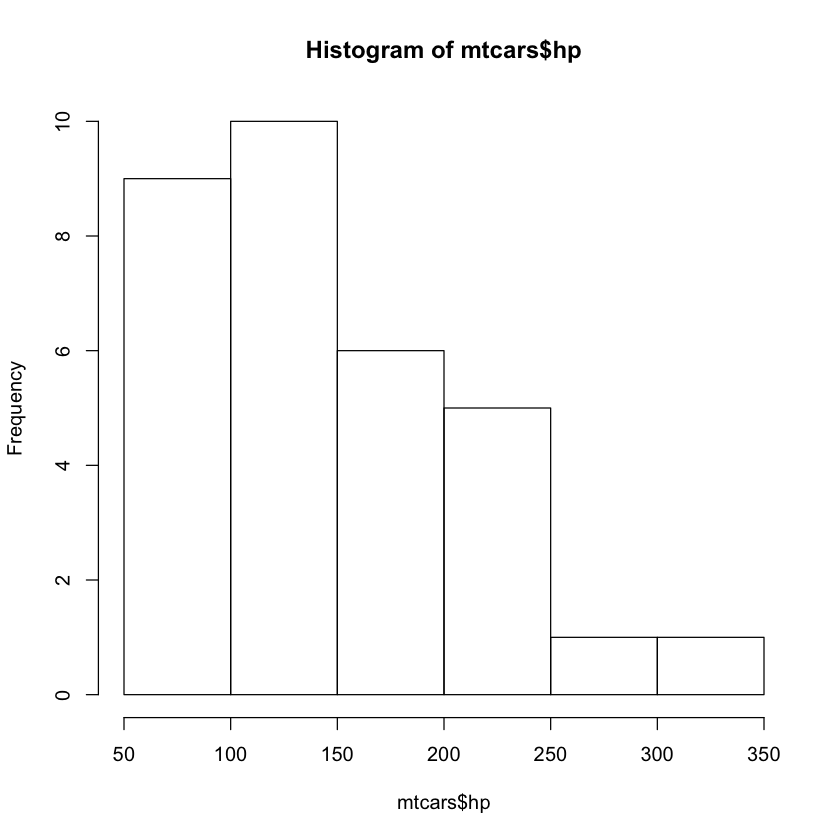

In [57]:
hist(mtcars$hp)

# Scatterplot
Lets see if there is a relationship between the hoursepower and the weight of a car.

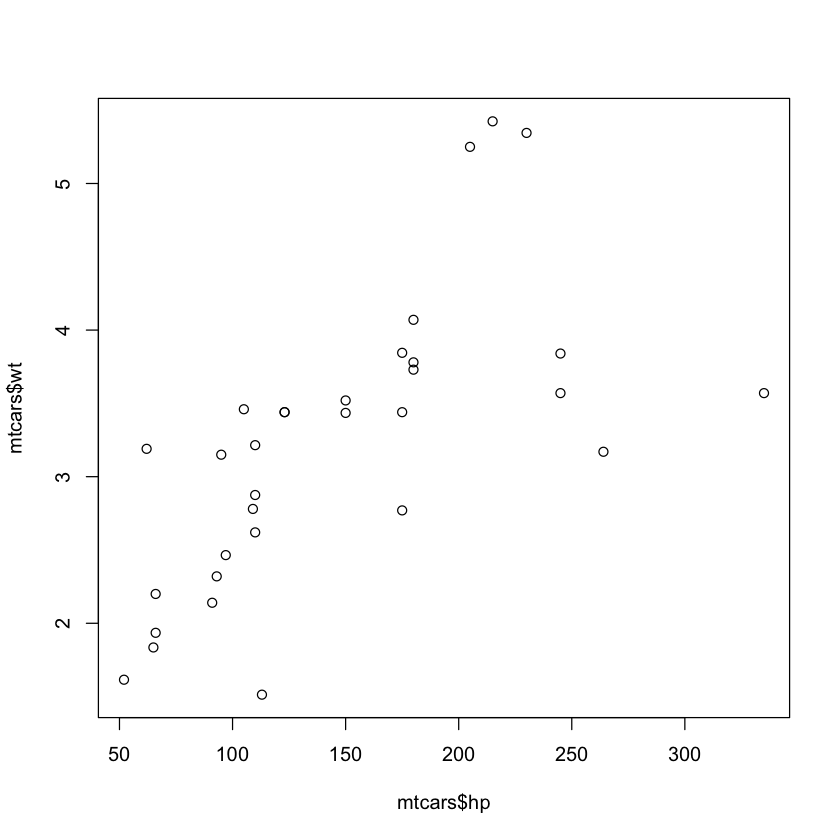

In [42]:
plot(mtcars$hp, mtcars$wt)

# Correlation investigation
In many expolratory data analyses, it is better to ahve the scatter plot of all attributes in a matrix.


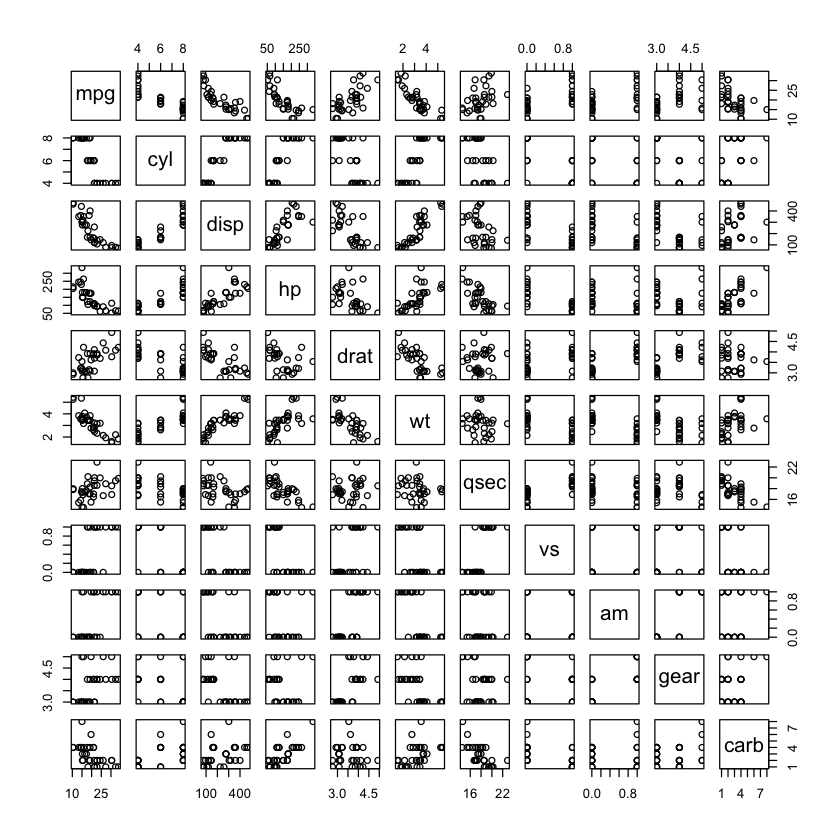

In [43]:
pairs(mtcars)

In [44]:
? pairs

pairs                 package:graphics                 R Documentation

_S_c_a_t_t_e_r_p_l_o_t _M_a_t_r_i_c_e_s

_D_e_s_c_r_i_p_t_i_o_n:

     A matrix of scatterplots is produced.

_U_s_a_g_e:

     pairs(x, ...)
     
     ## S3 method for class 'formula'
     pairs(formula, data = NULL, ..., subset,
           na.action = stats::na.pass)
     
     ## Default S3 method:
     pairs(x, labels, panel = points, ...,
           horInd = 1:nc, verInd = 1:nc,
           lower.panel = panel, upper.panel = panel,
           diag.panel = NULL, text.panel = textPanel,
           label.pos = 0.5 + has.diag/3, line.main = 3,
           cex.labels = NULL, font.labels = 1,
           row1attop = TRUE, gap = 1, log = "")
     
_A_r_g_u_m_e_n_t_s:

       x: the coordinates of points given as numeric columns of a
          matrix or data frame.  Logical and factor columns are
          converted to numeric in the same way that ‘data.matrix’ does.

 formula: a formula, such as ‘~ x + y + z’.  Each term will give a
          separate variable in the pairs plot, so terms should be
          numeric vectors.  (A response will be interpreted as another
          variable, but not treated specially, so it is confusing to
          use one.)

    data: a data.frame (or list) from which the variables in ‘formula’
          should be taken.

  subset: an optional vector specifying a subset of observations to be
          used for plotting.

na.action: a function which indicates what should happen when the data
          contain ‘NA’s.  The default is to pass missing values on to
          the panel functions, but ‘na.action = na.omit’ will cause
          cases with missing values in any of the variables to be
          omitted entirely.

  labels: the names of the variables.

   panel: ‘function(x, y, ...)’ which is used to plot the contents of
          each panel of the display.

     ...: arguments to be passed to or from methods.

          Also, graphical parameters can be given as can arguments to
          ‘plot’ such as ‘main’.  ‘par("oma")’ will be set
          appropriately unless specified.

horInd, verInd: The (numerical) indices of the variables to be plotted
          on the horizontal and vertical axes respectively.

lower.panel, upper.panel: separate panel functions (or ‘NULL’) to be
          used below and above the diagonal respectively.

diag.panel: optional ‘function(x, ...)’ to be applied on the diagonals.

text.panel: optional ‘function(x, y, labels, cex, font, ...)’ to be
          applied on the diagonals.

label.pos: ‘y’ position of labels in the text panel.

line.main: if ‘main’ is specified, ‘line.main’ gives the ‘line’
          argument to ‘mtext()’ which draws the title.  You may want to
          specify ‘oma’ when changing ‘line.main’.

cex.labels, font.labels: graphics parameters for the text panel.

row1attop: logical. Should the layout be matrix-like with row 1 at the
          top, or graph-like with row 1 at the bottom?

     gap: distance between subplots, in margin lines.

     log: a character string indicating if logarithmic axes are to be
          used: see ‘plot.default’.  ‘log = "xy"’ specifies logarithmic
          axes for all variables.

_D_e_t_a_i_l_s:

     The ijth scatterplot contains ‘x[,i]’ plotted against ‘x[,j]’.
     The scatterplot can be customised by setting panel functions to
     appear as something completely different. The off-diagonal panel
     functions are passed the appropriate columns of ‘x’ as ‘x’ and
     ‘y’: the diagonal panel function (if any) is passed a single
     column, and the ‘text.panel’ function is passed a single ‘(x, y)’
     location and the column name.  Setting some of these panel
     functions to ‘NULL’ is equivalent to _not_ drawing anything there.

     The graphical parameters ‘pch’ and ‘col’ can be used to specify a
     vector of plotting symbols and colors to be used in the plots.

     The graphical 

# Removing indices
We may remove some of the indeces that are not our interest.
First see how we can remove an index from a vector, then we use it to remove some scatterplots out of pairs.

[1] 1 4 5 6

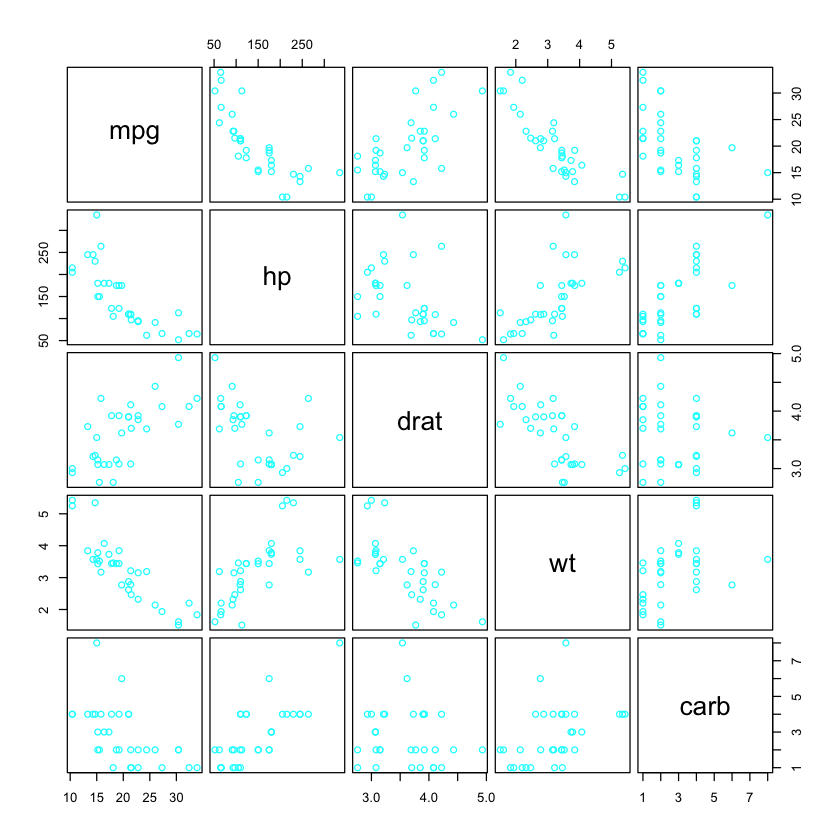

In [45]:
(1:6)[-c(2,3)]
pairs(mtcars,gap=0.5, col="cyan", horInd=c((1:6)[-c(2,3)],11),verInd=c((1:6)[-c(2,3)],11))

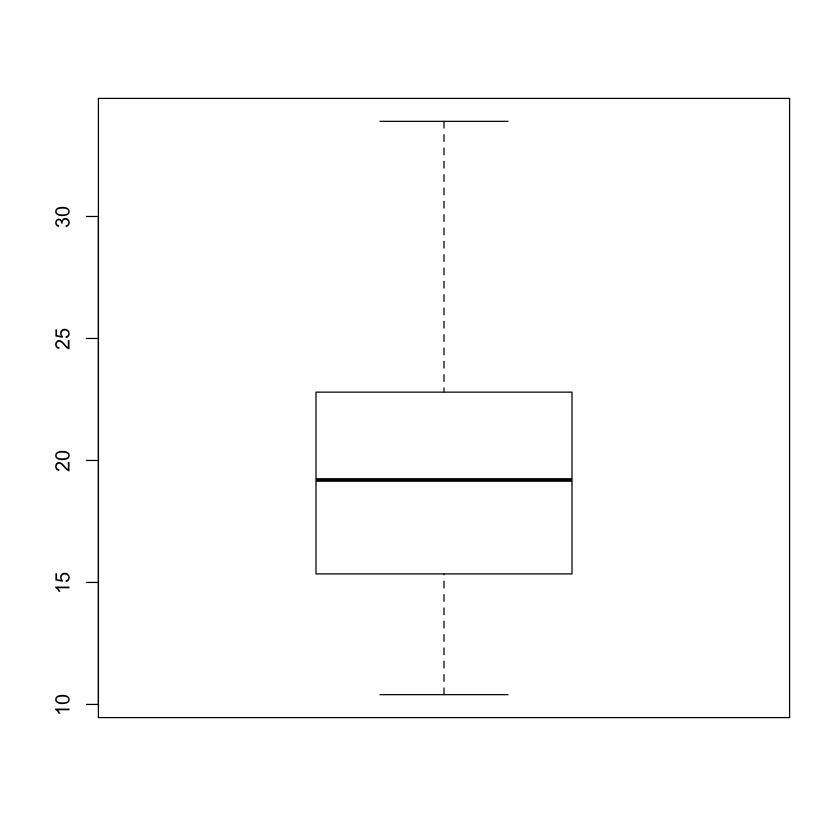

In [46]:
boxplot(mtcars$mpg)

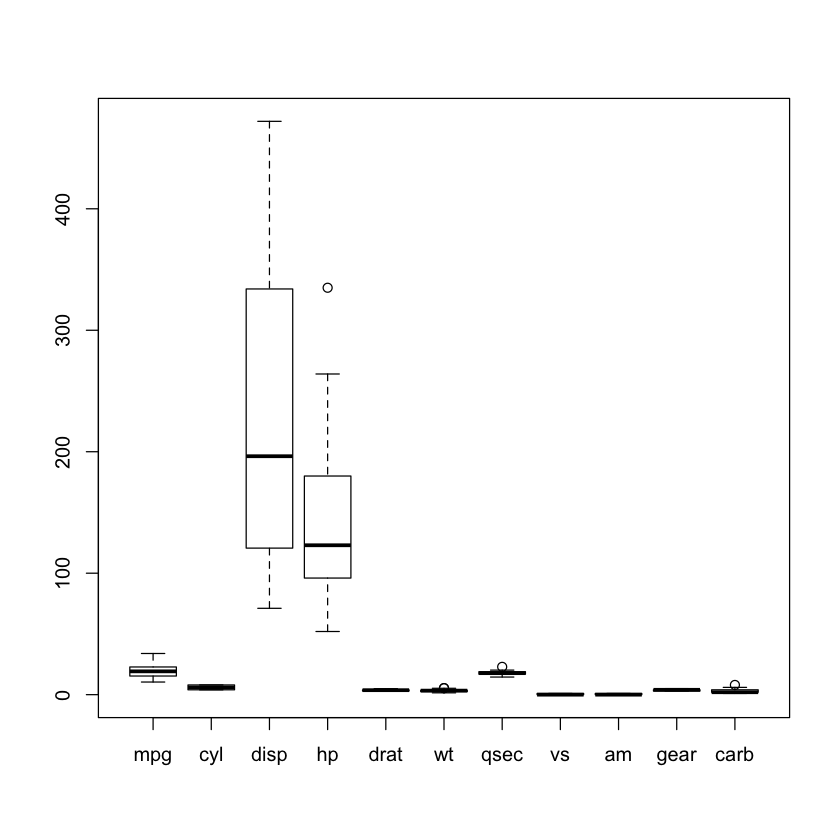

In [47]:
boxplot(mtcars)

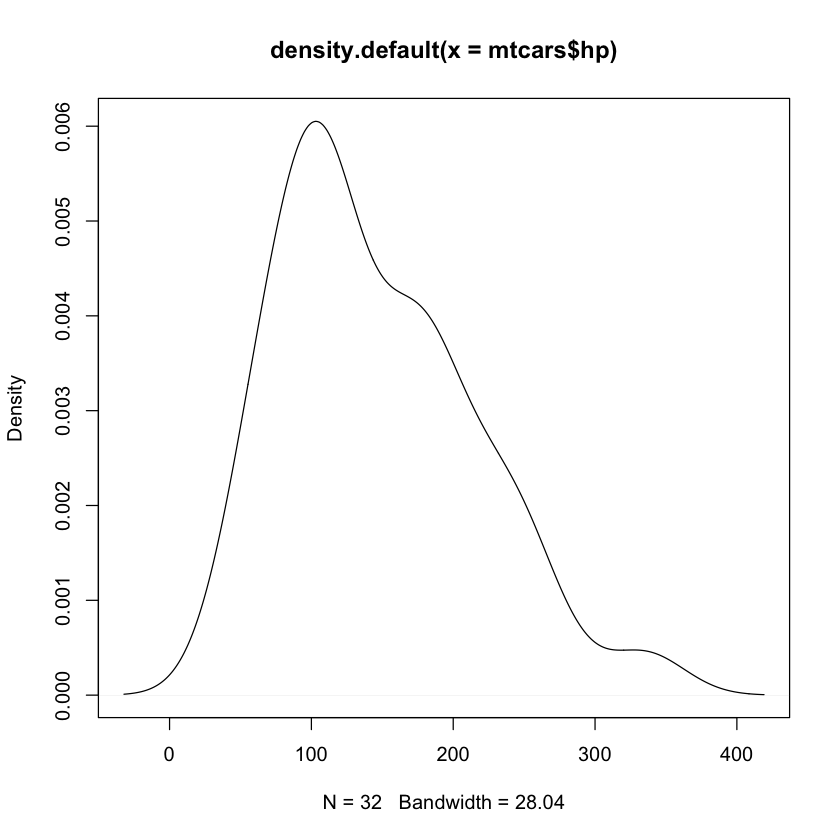

In [48]:
plot(density(mtcars$hp))


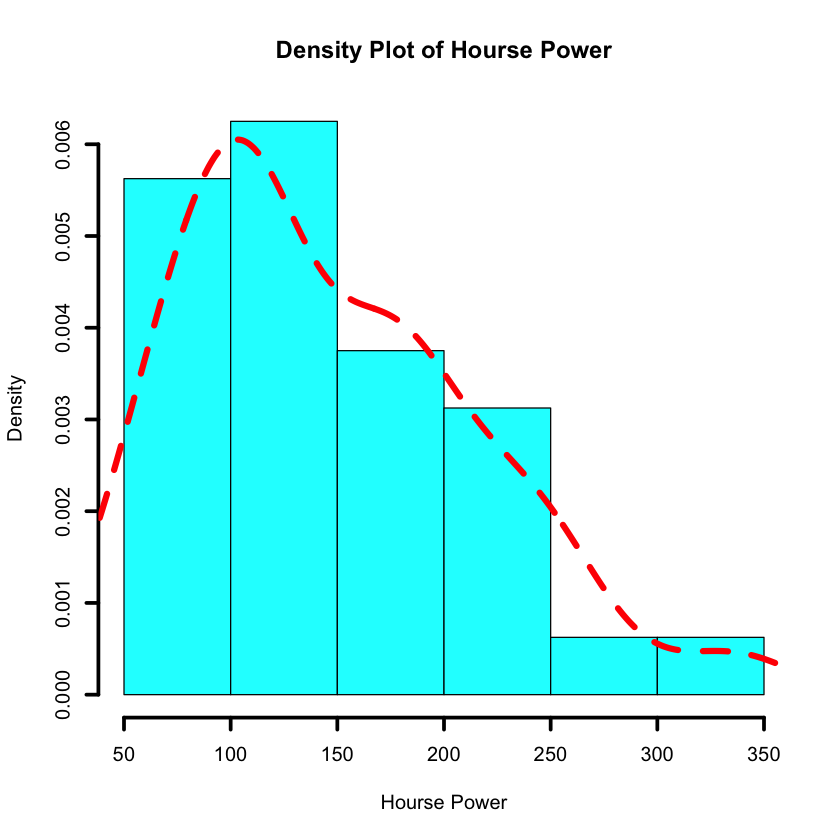

In [49]:
hist(mtcars$hp, freq=FALSE, col="cyan",main="Density Plot of Hourse Power", xlab="Hourse Power",lwd=3)
points(density(mtcars$hp),type="l", col="red", lty=2, lwd=5)


# How to create a beautiful plot?
How an R expert reaches to such a beautiful plot? Think about data visualization seriously. Beautiful plot motivates other people to pay for your data analyses. When you plot, you must use your sense of art.

# Step 1: 
Plot separately

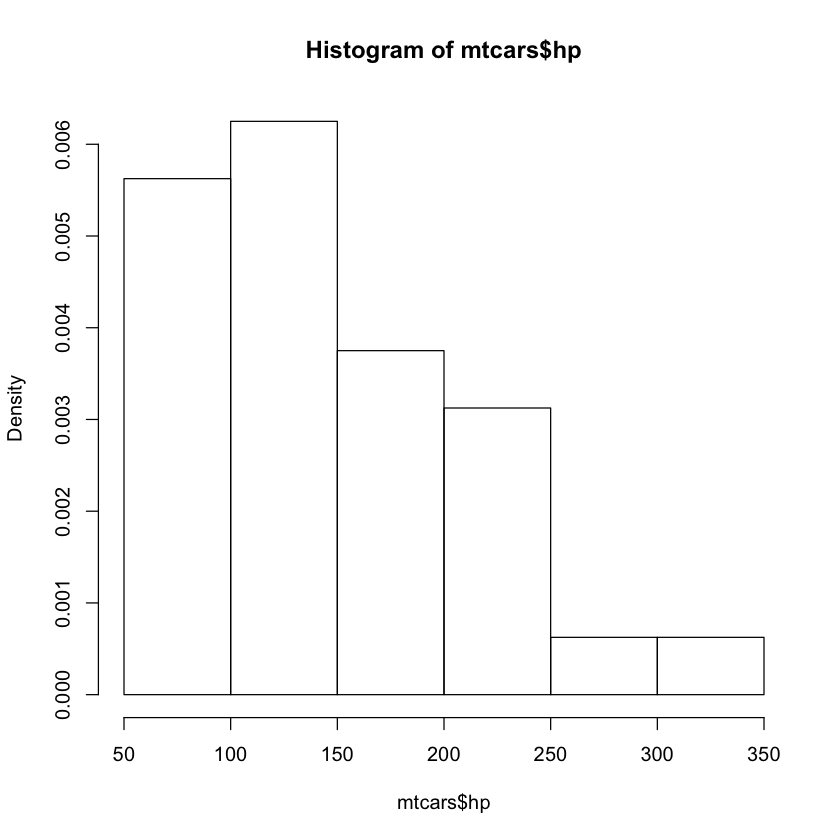

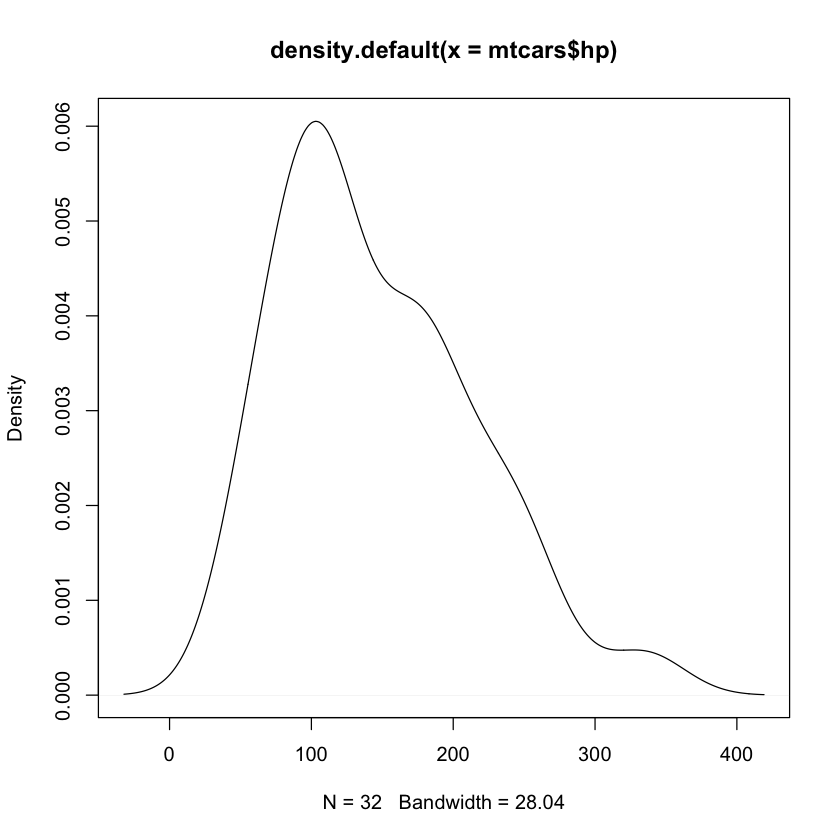

In [50]:
hist(mtcars$hp, freq=FALSE)
plot(density(mtcars$hp))

# Step 2: Make it overlay

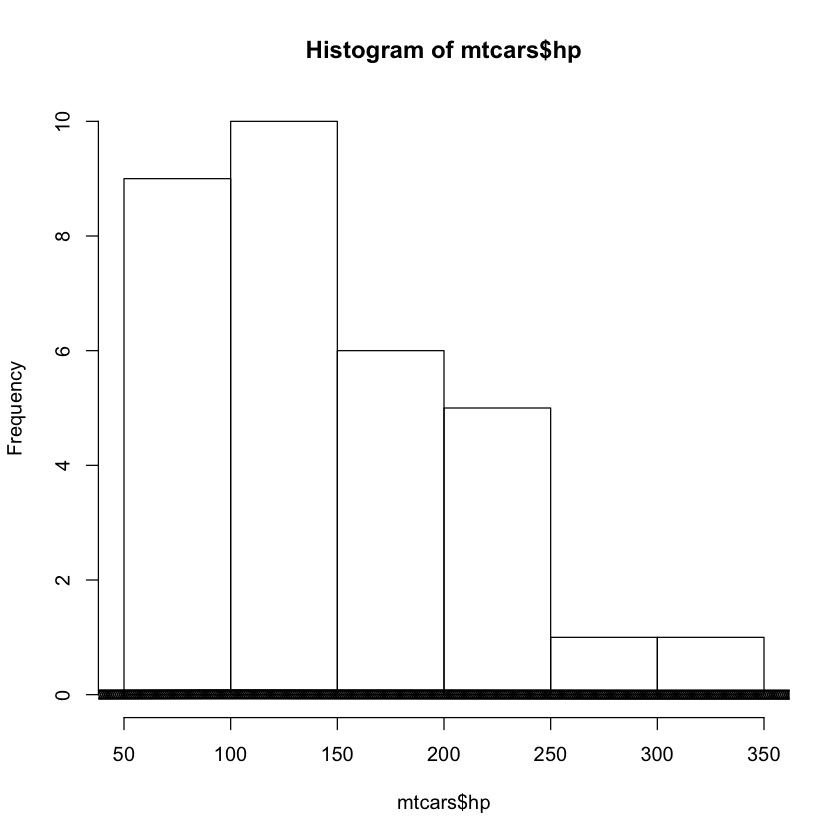

In [51]:
hist(mtcars$hp)
points(density(mtcars$hp))

# Step 3: Match the axes

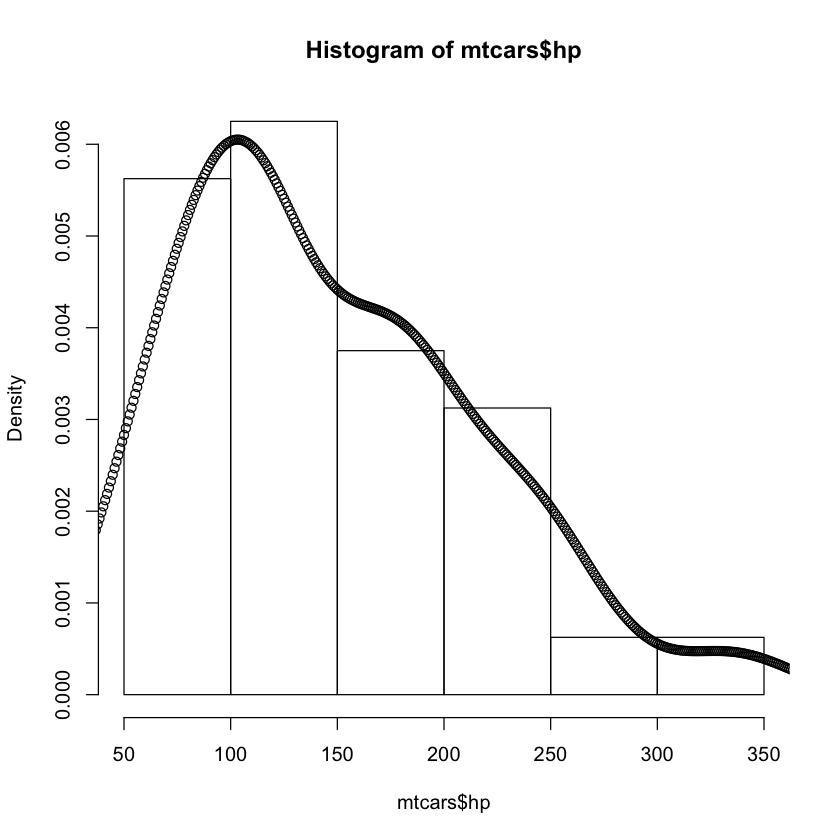

In [52]:
hist(mtcars$hp, freq=FALSE)
points(density(mtcars$hp))


# Step 4: Set the essetial details


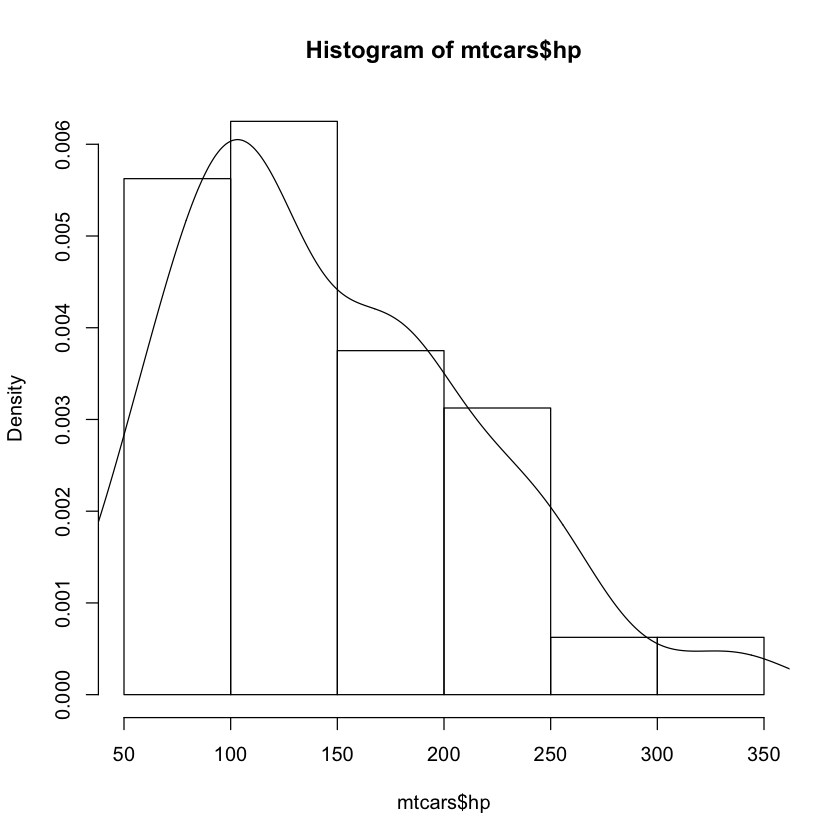

In [53]:

hist(mtcars$hp, freq=FALSE)
points(density(mtcars$hp),type="l")


# Step 5: Set all details

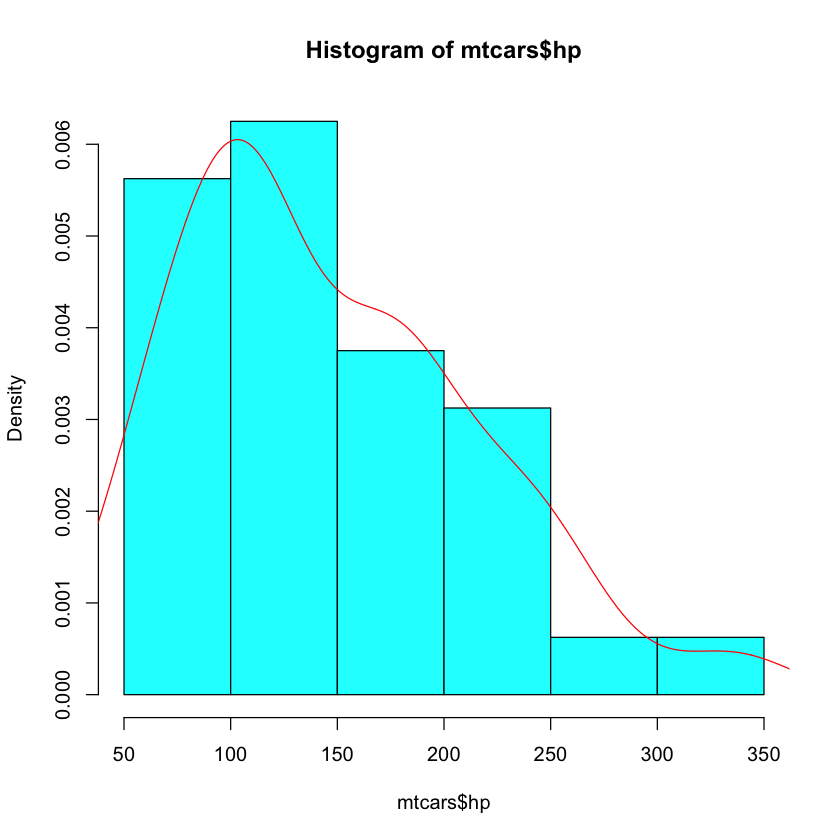

In [54]:
hist(mtcars$hp, freq=FALSE, col="cyan")
points(density(mtcars$hp),type="l", col="red")

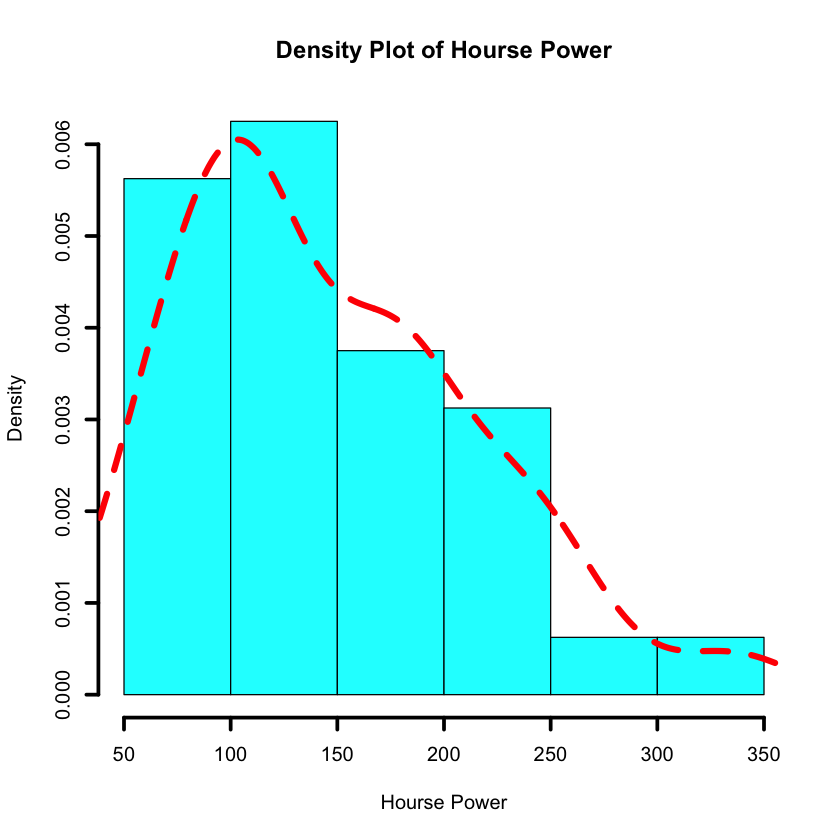

In [55]:
hist(mtcars$hp, freq=FALSE, col="cyan",main="Density Plot of Hourse Power", xlab="Hourse Power",lwd=3)
points(density(mtcars$hp),type="l", col="red", lty=2, lwd=5)